<a href="https://colab.research.google.com/github/abeyp/mail_in_ballot_WA/blob/main/exploratory_022022_wa_special_election.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Washington Vote by Ballot

Ideas
- General Election Drop Box Usage. trend of increasing percentage of total ballators returned in recent General Elections. In the last 2 presidential election, there is a large bump increase in percentage of total ballots returned. Can you predict for Nov General? Can you predict for Primary?

- See what is readily available on the sos.wa.gov/elections site, and visualize a few of the tables as a warm-up.


In [15]:
#Install packages
import pandas as pd
import matplotlib.pyplot as plt


Import data

In [ ]:
king_df = pd.read_csv('')

In [1]:
#when working in colab

# from google.colab import auth
# auth.authenticate_user()

# import gspread
# from google.auth import default
# creds, _ = default()

# gc = gspread.authorize(creds)

In [4]:
worksheet = gc.open('BallotStatusReport_20220218_KI').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

king_df = pd.DataFrame.from_records(rows)

In [11]:
#cleaning to replace header as first row
king_df.rename(columns=king_df.iloc[0, :], inplace=True)
king_df.drop(king_df.index[0], inplace=True)

TODO: remove personal information...address?

In [12]:
king_df.head()

,Ballot ID,Voter ID,County,First Name,Last Name,Gender,Election,Ballot Status,Challenge Reason,Sent Date,...,City,State,Zip,Country,Split,Precinct,Return Method,Return Location,Batch Sent,Batch Returned
1,106943949,3618667,King,VICKI,AABERG,F,Special Feb 8 2022,Accepted,,1/19/2022 0:00,...,KENT,WA,98030,USA,3911.652,KEN 47-3911,Mail,,24311,10955
2,106696683,11717681,King,ISABEL,AABERG,F,Special Feb 8 2022,Accepted,,1/19/2022 0:00,...,KENT,WA,98030,USA,3911.652,KEN 47-3911,Mail,,24311,11259
3,106445951,1387270,King,GLEN,AABERG,M,Special Feb 8 2022,Accepted,,1/19/2022 0:00,...,KENT,WA,98030,USA,3911.652,KEN 47-3911,Mail,,24311,10955
4,106955695,3020297,King,DAVID,AABY,M,Special Feb 8 2022,Accepted,,1/19/2022 0:00,...,ENUMCLAW,WA,98022,USA,3247.757,ENM 31-3247,Drop Box,Enumclaw Library,24311,12080
5,106553483,3575702,King,JACQUELYN,AABY,F,Special Feb 8 2022,Accepted,,1/19/2022 0:00,...,RENTON,WA,98058,USA,2459.959,FAIRHAVEN,Mail,,24311,10233


In [13]:
king_df.columns

Index(['Ballot ID', 'Voter ID', 'County', 'First Name', 'Last Name', 'Gender',
       'Election', 'Ballot Status', 'Challenge Reason', 'Sent Date',
       'Received Date', 'Address', 'City', 'State', 'Zip', 'Country', 'Split',
       'Precinct', 'Return Method', 'Return Location', 'Batch Sent',
       'Batch Returned'],
      dtype='object')

Quick look:
- visualize return method {Mail, Drop Box}
- Received Date
- Total from each city
- return method by gender?

Mail        214890
Drop Box    145872
Name: Return Method, dtype: int64


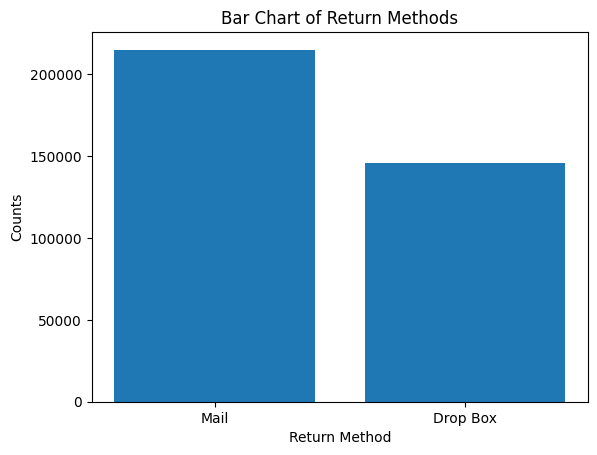

In [21]:
# create a bar chart of total counts: mail vs drop box

#total counts for each value
return_method_counts = king_df['Return Method'].value_counts()
selected_counts = return_method_counts.loc[['Mail','Drop Box']]
print(selected_counts)

#Bar chart
plt.bar(selected_counts.index, selected_counts.values)
plt.xlabel('Return Method')
plt.ylabel('Counts')
plt.title('Bar Chart of Return Methods')
plt.show()